# <h1 align="center"><font color="red">Multimodal Embeddings: An Introduction</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [Shaw Talebi](https://towardsdatascience.com/multimodal-embeddings-an-introduction-5dc36975966f)

# <h1 align="center"><font color="gree">Usando CLIP para classificação de 0-shot e pesquisa de imagens</font></h1>

# <font color="pink">Baixando as imagens</font>

In [ ]:
#%cd /home/eddygiusepe/2_EddyGiusepe_Estudo/Exploring_the_World_of_Programming_with_Python/41_Multimodal_Embeddings_images-audio-video/images

# !wget -O cat_cute.png https://raw.githubusercontent.com/ShawhinT/YouTube-Blog/main/multimodal-ai/2-mm-embeddings/images/cat_cute.png
# !wget -O cat_meme.png https://github.com/ShawhinT/YouTube-Blog/blob/main/multimodal-ai/2-mm-embeddings/images/cat_meme.png
# !wget -O dog.png https://github.com/ShawhinT/YouTube-Blog/blob/main/multimodal-ai/2-mm-embeddings/images/dog.png
# !wget -O goat.png https://github.com/ShawhinT/YouTube-Blog/blob/main/multimodal-ai/2-mm-embeddings/images/goat.png

# As imagens baixadas não foram renderizadas corretamente.

# <font color="red">Application 1: 0-shot Classification</font>

In [1]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel


# import model: https://huggingface.co/openai/clip-vit-base-patch16
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
# import processor (handles text tokenization and image preprocessing):
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16") 

def classify_image(image, text_classes):
    """
        Função auxiliar para fazer classificação de imagem 0-shot com CLIP.
    """

    # pass image and text classes to processor:
    inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)
    # pass inputs to CLIP
    outputs = model(**inputs) # note: "**" unpacks dictionary items
    logits_per_image = outputs.logits_per_image # image-text similarity score
    probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax
    # prediction
    predicted_class = text_classes[probs.argmax()]
    prob_class = round(float(probs[0][probs.argmax()]),4)

    return predicted_class, prob_class


def image_search(image_list, query):
    """
        Função auxiliar para corresponder a consulta a uma imagem em image_list.
    """

    inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    
    logits_per_text = outputs.logits_per_text
    probs = logits_per_text.softmax(dim=1)

    # best match
    best_match = image_list[probs.argmax()]
    prob_match = round(float(probs[0][probs.argmax()]),4)

    return best_match, prob_match

# <font color="pink">cat vs dog</font>

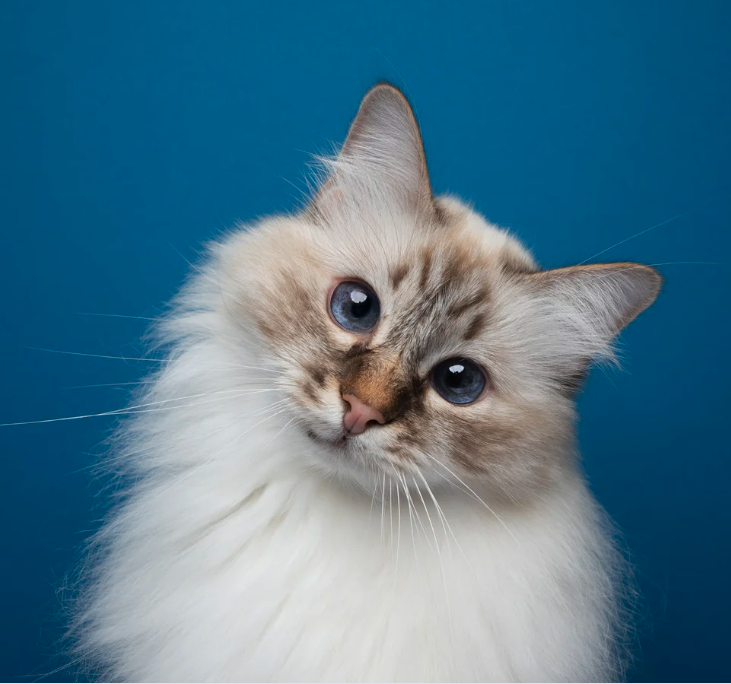

In [2]:
# load image:
image = Image.open("images/cat_cute.png")
image

In [3]:
# define text classes
text_classes = ["a photo of a cat", "a photo of a dog"]

# pass image and text classes to processor
inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)

In [4]:
# pass inputs to CLIP
outputs = model(**inputs) # note: "**" unpacks dictionary items
logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax

In [5]:
# print prediction:
predicted_class = text_classes[probs.argmax()]
print(predicted_class, "| Probability = ", round(float(probs[0][probs.argmax()]),4))

a photo of a cat | Probability =  0.9979


# <font color="pink">cat vs ugly</font>

In [6]:
# define text classes
text_classes = ["ugly cat", "cute cat"]

predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

cute cat | Probability =  0.9703


# <font color="pink">cat meme vs not cat meme</font>

In [7]:
# define text classes
text_classes = ["cat meme", "not cat meme"]

predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

not cat meme | Probability =  0.5464


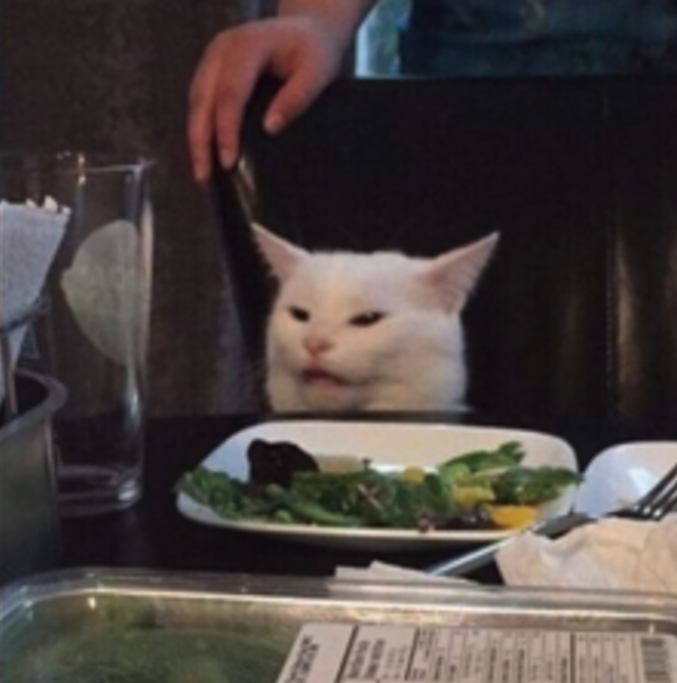

In [8]:
# Other example:
# load image
image = Image.open("images/cat_meme.png")
image

In [9]:
predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

cat meme | Probability =  0.8338


# <font color="red">Application 2: Image Search</font>

In [10]:
# create list of images to search over
image_name_list = ["images/cat_cute.png", "images/dog.png", "images/goat.png"]

image_list = []
for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [11]:
image_list # O modo RGBA é uma extensão do modo RGB comum, com a adição do canal Alpha que controla a transparência/opacidade da imagem

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=731x684>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=731x545>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=575x511>]

In [12]:
# define a query:
query = "a cute dog"

In [13]:
# pass images and query to CLIP
inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

Match probability:  0.9817


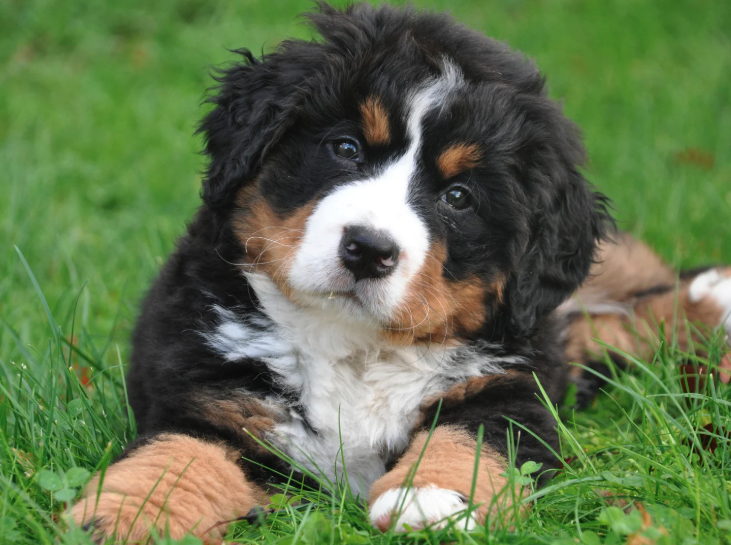

In [14]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.7715


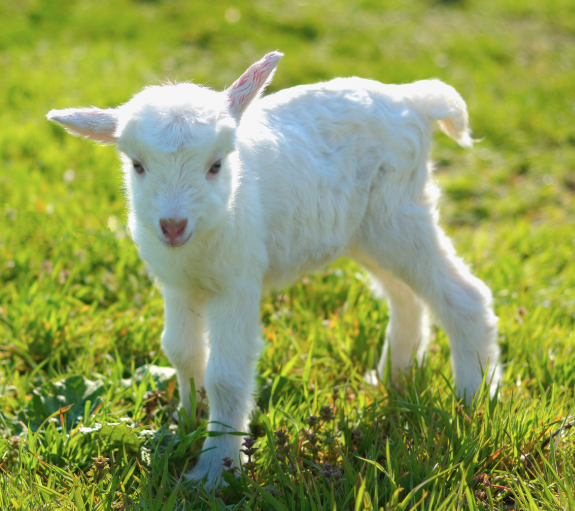

In [15]:
query = "something cute but metal 🤘"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.8248


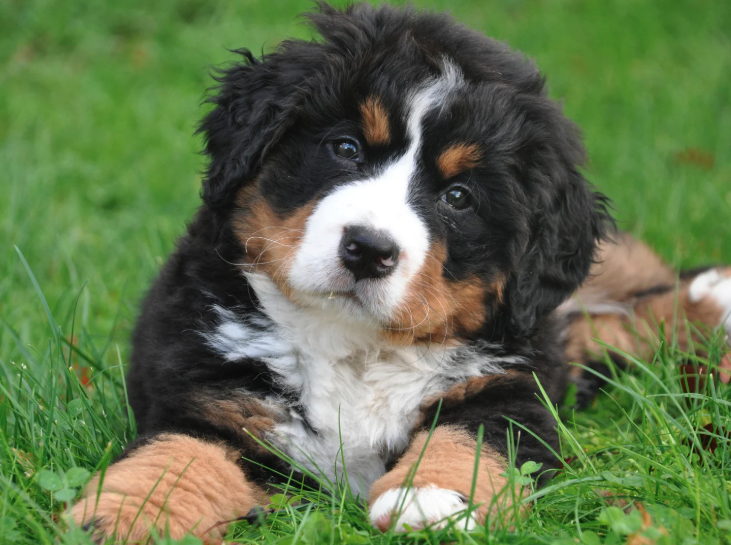

In [16]:
query = "a good boy"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.5874


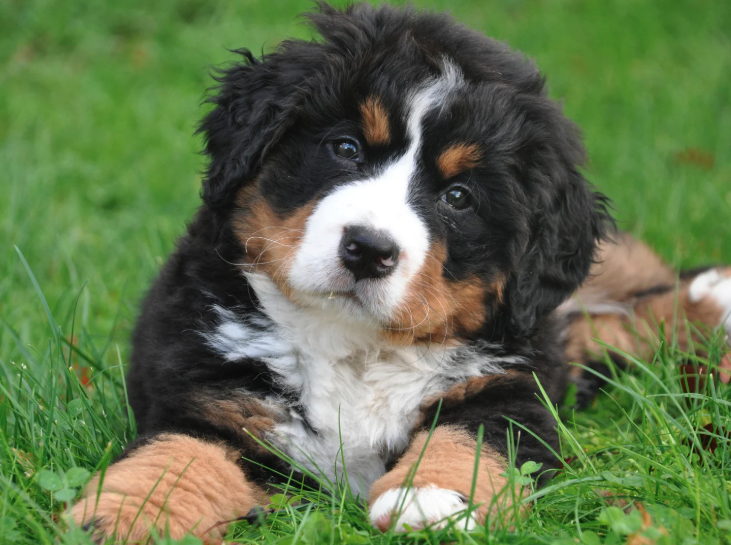

In [17]:
query = "Something black and white"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.5664


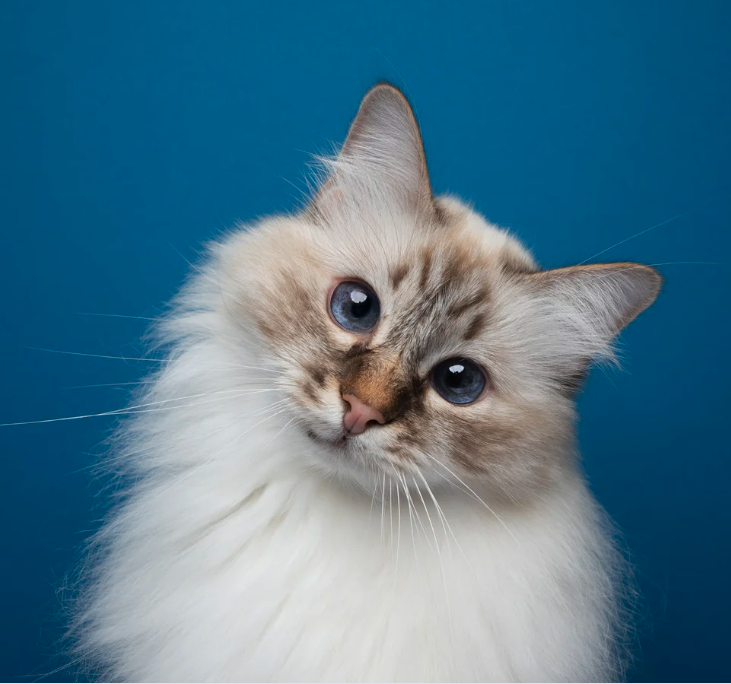

In [18]:
query = "the best pet in the world"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)